In [34]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [35]:
from keras.datasets import mnist

In [36]:
(x_train,y_class_train),(x_test,y_class_test) = mnist.load_data()

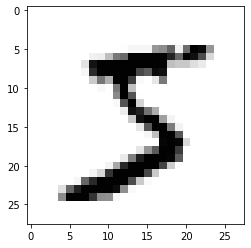

In [37]:
plt.imshow(x_train[0],cmap='Greys')
plt.show()

In [38]:
x_train = x_train.reshape(x_train.shape[0],784).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0],784).astype('float32')/255
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_class_train,10)
y_test = np_utils.to_categorical(y_class_test,10)



from keras.callbacks import ModelCheckpoint,EarlyStopping
import os
MODEL_DIR='./model_cnn/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath='./model_cnn/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss',verbose=1,save_best_only=True)
earlystopping = EarlyStopping(monitor='val_loss',patience=10)


model = Sequential()
model.add(Dense(1024,input_dim=784,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=200,verbose=0,callbacks=[checkpointer,earlystopping])

print("\n Test Accuracy : %.4f"%(model.evaluate(x_test,y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.14731, saving model to ./model_cnn/01-0.1473.hdf5

Epoch 00002: val_loss improved from 0.14731 to 0.09203, saving model to ./model_cnn/02-0.0920.hdf5

Epoch 00003: val_loss improved from 0.09203 to 0.07485, saving model to ./model_cnn/03-0.0749.hdf5

Epoch 00004: val_loss improved from 0.07485 to 0.06675, saving model to ./model_cnn/04-0.0667.hdf5

Epoch 00005: val_loss improved from 0.06675 to 0.05977, saving model to ./model_cnn/05-0.0598.hdf5

Epoch 00006: val_loss improved from 0.05977 to 0.05898, saving model to ./model_cnn/06-0.0590.hdf5

Epoch 00007: val_loss did not improve from 0.05898

Epoch 00008: val_loss improved from 0.05898 to 0.05656, saving model to ./model_cnn/08-0.0566.hdf5

Epoch 00009: val_loss improved from 0.05656 to 0.05439, saving model to ./model_cnn/09-0.0544.hdf5

Epoch 00010: val_loss did not improve from 0.05439

Epoch 00011: val_loss did not improve from 0.05439

Epoch 00012: val_loss did not improve from 0.05

In [46]:

import cv2
img1=cv2.imread('2.jpg')
img2=cv2.imread('8.jpg')
img1_ = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2_ = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img1_ready = img1_.reshape(1,784).astype('float64')/255
img2_ready = img2_.reshape(1,784).astype('float64')/255
img_list=[img1_ready,img2_ready]

In [48]:
predictions = model.predict(img1_ready)
predictions

array([[3.6504860e-20, 1.5061537e-23, 8.3333633e-13, 3.1192712e-07,
        0.0000000e+00, 9.9994099e-01, 4.0158076e-14, 5.8633777e-05,
        1.3529964e-13, 1.3081353e-22]], dtype=float32)

In [49]:
predictions2=model.predict(img2_ready)
predictions2

array([[1.4898225e-19, 1.3288243e-22, 2.0484147e-11, 3.6890867e-06,
        0.0000000e+00, 9.9958450e-01, 1.2131172e-12, 4.1178140e-04,
        6.5863645e-13, 8.6236719e-22]], dtype=float32)